In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer,RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder

#
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
import lightgbm as lgb
import xgboost as xgb
import shap
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import datasets
%matplotlib inline
from sklearn import metrics
#
import scikitplot as skplt
#
import time

### Airline Passenger Satisfaction
https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data



In [2]:
df_train = pd.read_csv('trainCustomerSupervised.csv')
df_test = pd.read_csv('testCustomerSupervised.csv')

In [3]:
df = pd.concat([df_train, df_test], axis = 0, ignore_index=True)

In [4]:
df.shape

(129880, 25)

In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


In [9]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Not so many datapoints are NULL, so we can safely delete them without having any impact on 
the dataset information

In [10]:
df.dropna(inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     1294

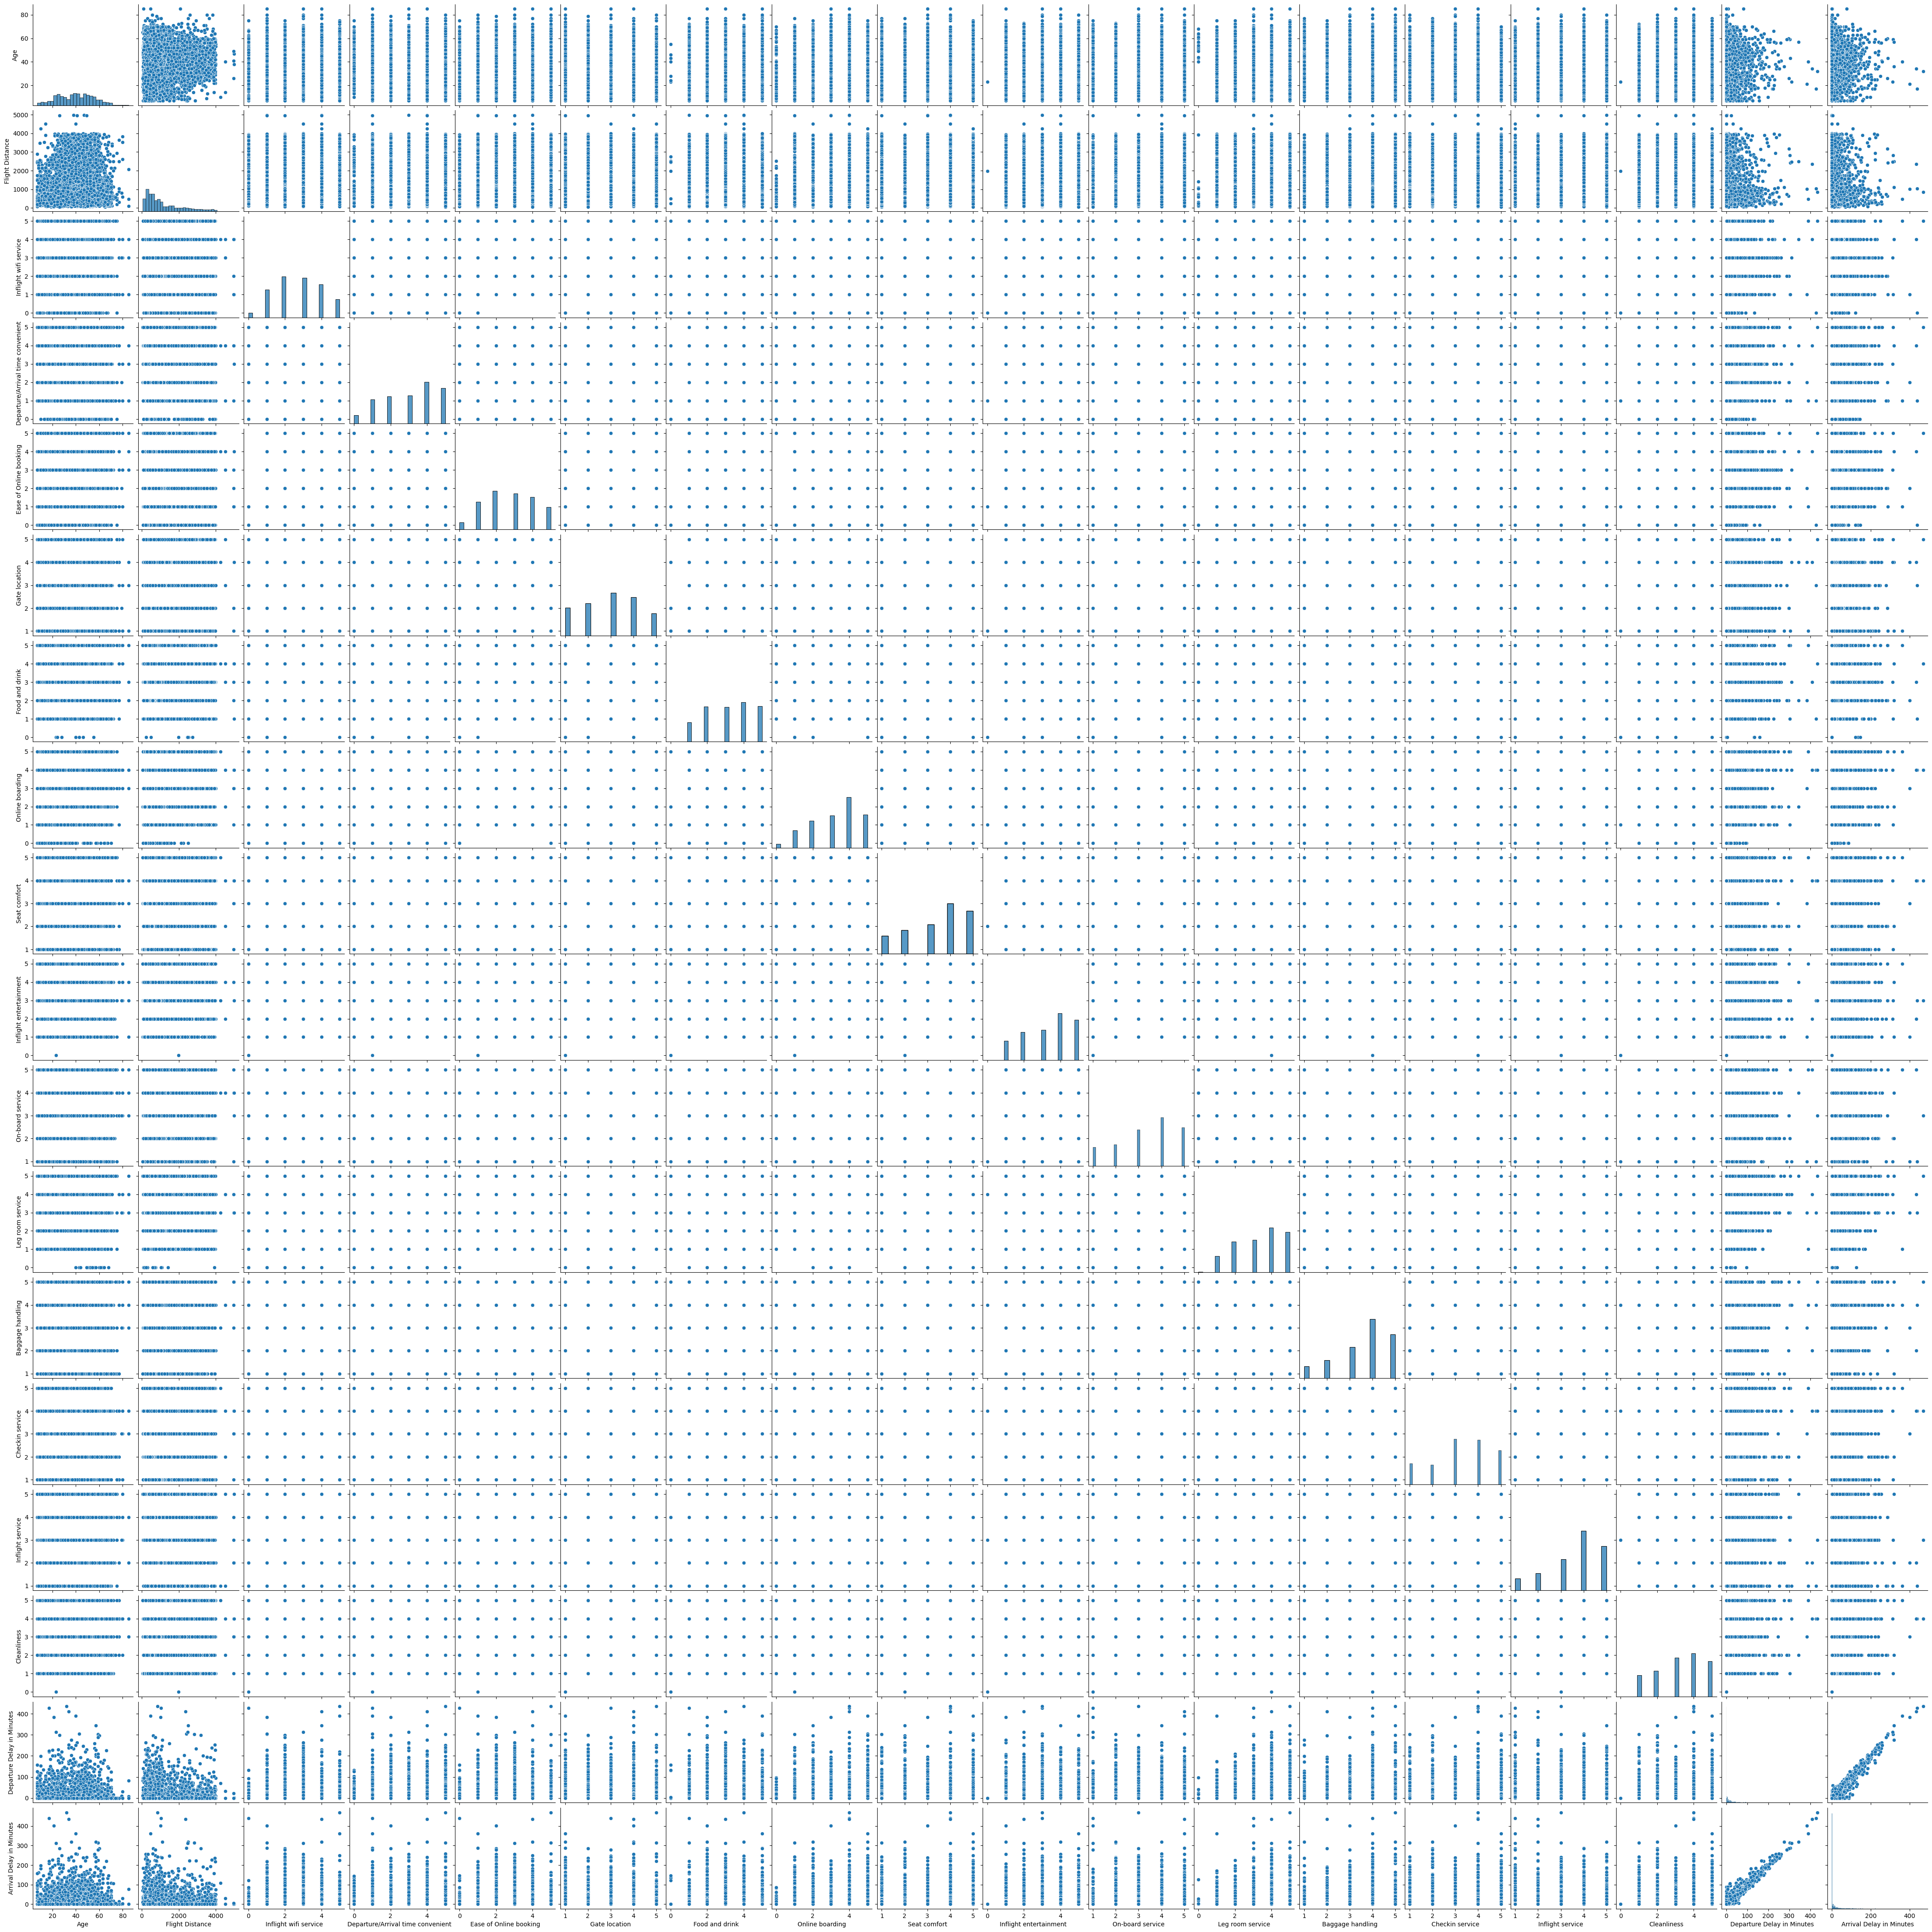

In [12]:
sample_df = df.sample(n=5000, random_state=42)
sns.pairplot(sample_df.drop('id', axis = 1))
plt.show()
None

In [13]:
#Find the categorical features
#Find Categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.columns


Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [14]:
#Find numeric variables
df_num = df.select_dtypes(include='number')
df_num.columns

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [15]:
#Find for each of the categorical values the discrete values
#Find the unique values of each categorical feature
df.apply(lambda col: col.unique())

id                                   [70172, 5047, 110028, 24026, 119299, 111157, 8...
Gender                                                                  [Male, Female]
Customer Type                                      [Loyal Customer, disloyal Customer]
Age                                  [13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3...
Type of Travel                                      [Personal Travel, Business travel]
Class                                                        [Eco Plus, Business, Eco]
Flight Distance                      [460, 235, 1142, 562, 214, 1180, 1276, 2035, 8...
Inflight wifi service                                               [3, 2, 4, 1, 5, 0]
Departure/Arrival time convenient                                   [4, 2, 5, 3, 1, 0]
Ease of Online booking                                              [3, 2, 5, 4, 1, 0]
Gate location                                                       [1, 3, 2, 5, 4, 0]
Food and drink                             

We see that many features are from a survey. From the pairplots we see that we have a distribution of voting values. 
But lets see if we have sparcity in some features

In [16]:
# Check for the percentage of zeros or NaNs in each column
zero_percentage = (df == 0).sum() / df.shape[0] * 100
nan_percentage = df.isna().sum() / df.shape[0] * 100

# Combine both into a sparsity DataFrame
sparsity = pd.DataFrame({'Zero Percentage': zero_percentage, 'NaN Percentage': nan_percentage})

# Display the result
print(sparsity)

                                   Zero Percentage  NaN Percentage
id                                        0.000000             0.0
Gender                                    0.000000             0.0
Customer Type                             0.000000             0.0
Age                                       0.000000             0.0
Type of Travel                            0.000000             0.0
Class                                     0.000000             0.0
Flight Distance                           0.000000             0.0
Inflight wifi service                     3.018064             0.0
Departure/Arrival time convenient         5.146463             0.0
Ease of Online booking                    4.375729             0.0
Gate location                             0.000772             0.0
Food and drink                            0.100396             0.0
Online boarding                           2.371667             0.0
Seat comfort                              0.000772            

56% of the flights have NO DELAY. So half of this column is with 0

In [17]:
df[df['Departure Delay in Minutes'] == 0].groupby('satisfaction')['satisfaction'].value_counts()

satisfaction             satisfaction           
neutral or dissatisfied  neutral or dissatisfied    39569
satisfied                satisfied                  33640
Name: satisfaction, dtype: int64

In [18]:
df[df['Departure Delay in Minutes'] != 0].groupby('satisfaction')['satisfaction'].value_counts()

satisfaction             satisfaction           
neutral or dissatisfied  neutral or dissatisfied    33656
satisfied                satisfied                  22622
Name: satisfaction, dtype: int64

THERE DOES NOT SEEM TO BE ANY DATA LEAKAGE

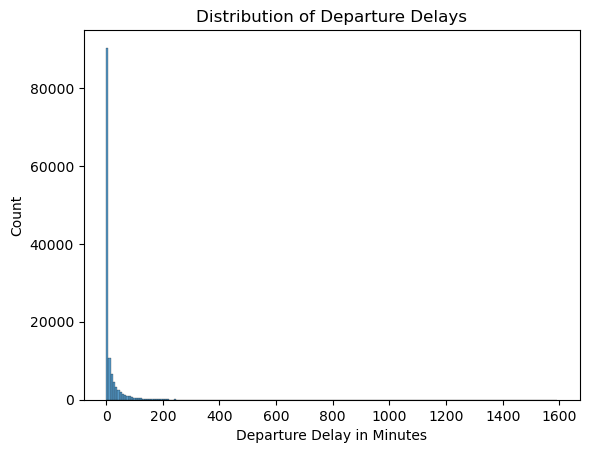

In [19]:
# Histogram to visualize the distribution of 'Departure Delay in Minutes'
sns.histplot(df['Departure Delay in Minutes'], bins = 200)
plt.title('Distribution of Departure Delays')
plt.show()

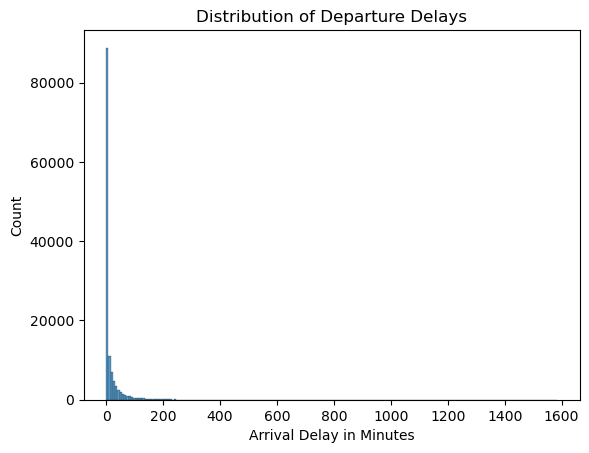

In [20]:
# Histogram to visualize the distribution of 'Departure Delay in Minutes'
sns.histplot(df['Arrival Delay in Minutes'], bins = 200)
plt.title('Distribution of Departure Delays')
plt.show()

the dataset is skewed toward "no delays". We will use Feature Engineering to create a new feature which we will call
Delayed 1= delayed 0=not delayed. With this we will see how big is the impact of the delay time value

In [21]:
df['Delayed'] = df['Departure Delay in Minutes'].apply(lambda x: 1 if x > 0 else 0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     1294

Find highly correlated pairs

In [23]:
dfi = df.drop('id',axis = 1)

C:\Users\kathe\AppData\Local\Temp\ipykernel_8552\3361486430.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfi.corr().abs()  # Use absolute values of the correlations


Highly correlated pairs (correlation > 0.95):
('Arrival Delay in Minutes', 'Departure Delay in Minutes')


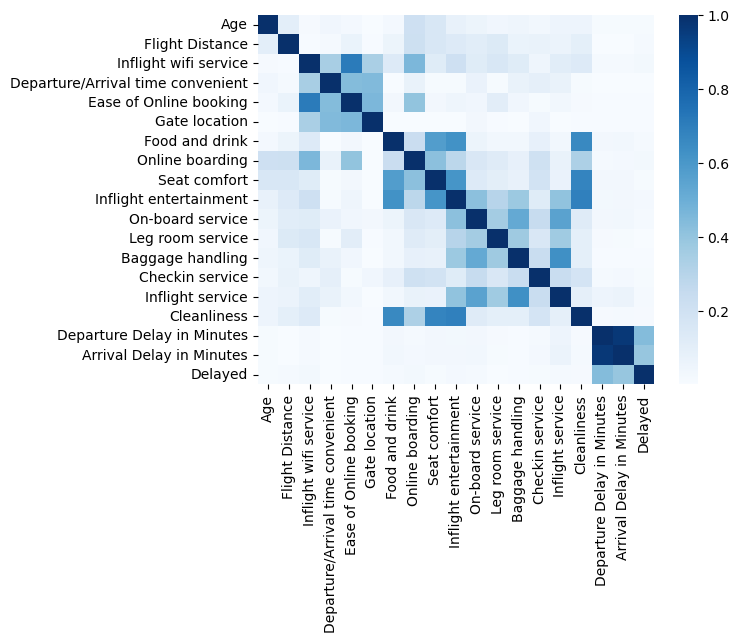

In [24]:
## See Correlation matrix
#plt.figure(figsize=(10, 6))
# Calculate the correlation matrix
corr_matrix = dfi.corr().abs()  # Use absolute values of the correlations
sns.heatmap(corr_matrix,  cmap='Blues')

# Select upper triangle of the correlation matrix (to avoid duplicate pairs)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index pairs where correlation is greater than 0.95
high_corr_pairs = [(column, index) for column in upper_triangle.columns for index in upper_triangle.index if upper_triangle.loc[index, column] > 0.90]

# Display highly correlated pairs
print("Highly correlated pairs (correlation > 0.95):")
for pair in high_corr_pairs:
    print(pair)

In [25]:
# Display highly correlated pairs
# Find index pairs where correlation is greater than 0.95
high_corr_pairs = [(column, index) for column in upper_triangle.columns for index in upper_triangle.index if upper_triangle.loc[index, column] > 0.96]
print("Highly correlated pairs (correlation > 0.96):")
for pair in high_corr_pairs:
    print(pair)

Highly correlated pairs (correlation > 0.96):
('Arrival Delay in Minutes', 'Departure Delay in Minutes')


We see that Arrival Delay in Minutes / Departure Delay in Minutes are highly correlated. Which is logical
Also we see a correlation of 'Inflight Wifi Service' with 'Ease of Online Booking'. We are going to discard the Departure Delay in Minutes : since the Arrival might have a bigger impact on satisfaction / disatisfaction since it may impact business/lodging/connection flights etc. Keep this in mind to do later in the MODEL training.

In [26]:
#df.drop('Departure Delay in Minutes', axis = 1, inplace = True)

### TRAINING MODELS TO PREDICT TRAVELLER SATISFACTION - CLASSIFICATION

- Male/Female --> replace by 1,0  
- Customer Type --> Loyal Customer, disloyal Customer --> 1,0  
- Type of Travel --> Personal Travel, Business travel --> 0,1  
- Class --> [Eco Plus, Business, Eco] --> make ordinal since it has a monetary and value and different specs.  
Do this after train/test split to avoid Data Leakage 
- satisfaction --> neutral or dissatisfied, satisfied --> 0,1

In [198]:
dfm = df.copy()

In [199]:
dfm.shape

(129487, 25)

In [200]:
#Keep Customer ids
customersall = dfm['id']

In [201]:
#Keep part of the dataset for VALIDATION
dfval = dfm.sample(frac=0.05, random_state=42)  # 20% random sample

# Step 2: Drop the sampled rows from the original DataFrame to create dfm (without validation rows)
dfm = dfm.drop(dfval.index)
customersval = dfval['id']
print(dfm.shape)
print(dfval.shape)

(123013, 25)
(6474, 25)


In [202]:
dfm.drop('id',axis = 1, inplace = True)
dfm['Gender'] = (dfm['Gender'] == 'Male').astype(int)
dfm['Customer Type'] = (dfm['Customer Type'] == 'Loyal Customer').astype(int)
dfm['Type of Travel'] = (dfm['Type of Travel'] == 'Business travel').astype(int)
dfm['satisfaction'] = (dfm['satisfaction'] == 'satisfied').astype(int)

Check VISUALLY for Outliers

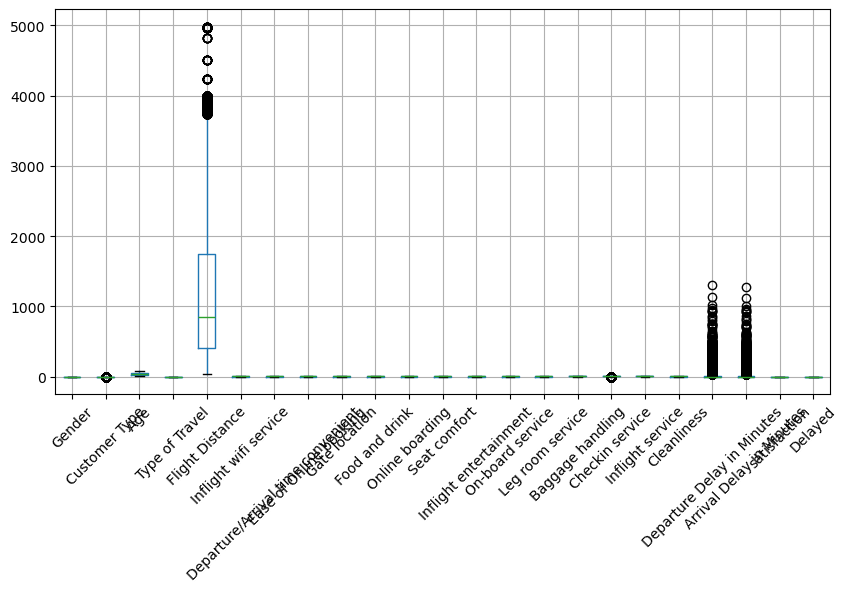

In [203]:
dfm.select_dtypes(include='number').boxplot(figsize=(10,5))
plt.xticks(rotation=45)  # You can adjust the degree of rotation (e.g., 45, 90)
plt.show()

We do have outliers, but they seem legitimate values, which apply when travelling.  
We are going to try first without removing them

In [204]:
#TRAIN/TEST Split and ordinal encode
# Train variables are all others except the target.
X = dfm.drop('satisfaction', axis=1)
# 'Card' is our target variable, the one we try to predict.
y = dfm['satisfaction']

#Split our X and y on train and test portions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

#ORDINAL ENCODING
#Separetely in Train and Test
# Define the order for the 'Class' column
class_order = ['Eco', 'Eco Plus', 'Business']

# Instantiate OrdinalEncoder with the custom order for 'Class'
ordinal_encoder = OrdinalEncoder(categories=[class_order])
#
X_train['Class'] = ordinal_encoder.fit_transform(X_train[['Class']]).astype(int)
X_test['Class'] = ordinal_encoder.transform(X_test[['Class']]).astype(int)

In [205]:
print(X_train.shape)
print(X_test.shape)

(98410, 23)
(24603, 23)


1.TEST SCALERS - LOGISTIC REGRESSION

We have run without taking out the outliers or Scaling and teh algorithm did not converge. so now we are being more careful

In [79]:
# Initialize an empty DataFrame to store records
records = pd.DataFrame(columns=['Methodology', 'Score', 'AUC', 'FPR', 'TPR','Duration'])

In [80]:
# List of scalers
scalers = [MinMaxScaler(), StandardScaler(), PowerTransformer(),RobustScaler()]

# Logistic regression model
lr = LogisticRegression(max_iter=300, C=1000000)

# Loop through each scaler
for scaler in scalers:
    start_time = time.time()
    try:
        # Apply the scaler to the training and test sets
        X_train_sc = scaler.fit_transform(X_train)
        X_test_sc = scaler.transform(X_test)
        
        # Fit the logistic regression model
        logreg = lr.fit(X_train_sc, y_train)
        
        # Make predictions
        y_pred = logreg.predict(X_test_sc)
        y_pred_proba = logreg.predict_proba(X_test_sc)[:, 1]
        
        # Calculate AUC
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        #
        elapsed_time = time.time() - start_time
        # Create a new DataFrame for this iteration's results
        new_record = pd.DataFrame([{
            'Methodology': 'LogisticRegression with {}'.format(scaler.__class__.__name__),
            'Score': round(lr.score(X_test_sc, y_test), 3),
            'AUC': round(auc, 3),
            'FPR': fpr,   # Save FPR values
            'TPR': tpr,    # Save TPR values
            'Duration': elapsed_time
        }])
        
        # Concatenate the new record with the existing DataFrame
        records = pd.concat([records, new_record], ignore_index=True)
    
    except Exception as e:
        # Catch and handle any exceptions
        print(f"An error occurred with scaler {scaler}: {str(e)}")
        # Continue to the next scaler without breaking the loop
        continue

# Print the final DataFrame with all the results
records


,Methodology,Score,AUC,FPR,TPR,Duration
0,LogisticRegression with MinMaxScaler,0.876,0.928,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.194654705167741...",0.353958
1,LogisticRegression with StandardScaler,0.877,0.928,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.195682646481637...",0.206641
2,LogisticRegression with PowerTransformer,0.878,0.931,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.263433323988412...",1.617893
3,LogisticRegression with RobustScaler,0.877,0.928,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.197084384636949...",0.259058


It seems that PowerTransformer works a bit better. But it takes almost double the time.  
Also since it seems that we have outliers, it would be better to use Robust Scaler.Also has good times

### 2. Test Various Models - Classifiers

In [81]:
classifiers = [
    LogisticRegression(),
    GaussianNB(),
    SVC(probability=True),
    KNeighborsClassifier(n_neighbors= 5),
    RandomForestClassifier(random_state = 42),     #Bagging 
    GradientBoostingClassifier(random_state = 42), #Boosting
    AdaBoostClassifier(random_state = 42),
    xgb.XGBClassifier(random_state = 42,use_label_encoder=False, eval_metric='logloss'),
    lgb.LGBMClassifier(random_state = 42)
    ]

for classifier in classifiers:
    start_time = time.time()
    try:  
        pipe = Pipeline(steps=[('scaler', RobustScaler()),
                      ('classifier', classifier)])
        pipe.fit(X_train, y_train)


        # Make predictions
        y_pred = pipe.predict(X_test)
        y_pred_proba = pipe.predict_proba(X_test)[:, 1]
        
        # Calculate AUC
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)

        elapsed_time = time.time() - start_time
        
        # Create a new DataFrame for this iteration's results
        new_record = pd.DataFrame([{
            'Methodology': '{}'.format(classifier.__class__.__name__),
            'Score': round(pipe.score(X_test, y_test), 3),
            'AUC': round(auc, 3),
            'FPR': fpr,   # Save FPR values
            'TPR': tpr,   # Save TPR values
            'Duration' : round(elapsed_time,3)
        }])
        
        # Concatenate the new record with the existing DataFrame
        records = pd.concat([records, new_record], ignore_index=True)
    
    except Exception as e:
        # Catch and handle any exceptions
        print(f"An error occurred with model {classifier}: {str(e)}")
        # Continue to the next scaler without breaking the loop
        continue

# Print the final DataFrame with all the results
records

c:\Users\kathe\miniconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 42687, number of negative: 55723
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 98410, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433767 -> initscore=-0.266499
[LightGBM] [Info] Start training from score -0.266499


,Methodology,Score,AUC,FPR,TPR,Duration
0,LogisticRegression with MinMaxScaler,0.876,0.928,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.194654705167741...",0.353958
1,LogisticRegression with StandardScaler,0.877,0.928,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.195682646481637...",0.206641
2,LogisticRegression with PowerTransformer,0.878,0.931,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.263433323988412...",1.617893
3,LogisticRegression with RobustScaler,0.877,0.928,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.197084384636949...",0.259058
4,LogisticRegression,0.877,0.928,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.197458181478366...",0.282000
5,GaussianNB,0.865,0.923,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.039715914400523...",0.156000
6,SVC,0.940,0.983,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.127277824502382...",1799.733000
7,KNeighborsClassifier,0.922,0.965,"[0.0, 0.004963314630988347, 0.0196374622356495...","[0.0, 0.7059153350154191, 0.8081487711428839, ...",10.876000
8,RandomForestClassifier,0.961,0.994,"[0.0, 0.0, 7.193209610128039e-05, 7.1932096101...","[0.0, 0.501635361181198, 0.5950845715353705, 0...",14.769000
9,GradientBoostingClassifier,0.941,0.987,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 9.344921035417251e-05, 0.000373796841416...",17.139000


In [82]:
#We are going to remove all scalers apart from Robust and also all Durations > 6
#Print the results afterwards

In [98]:
records_to_print = records[(records['Duration'] < 15)].iloc[4:, :]

In [99]:
records_to_print

,Methodology,Score,AUC,FPR,TPR,Duration
4,LogisticRegression,0.877,0.928,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.197458181478366...",0.282
5,GaussianNB,0.865,0.923,"[0.0, 0.0, 0.0, 7.193209610128039e-05, 7.19320...","[0.0, 9.344921035417251e-05, 0.039715914400523...",0.156
7,KNeighborsClassifier,0.922,0.965,"[0.0, 0.004963314630988347, 0.0196374622356495...","[0.0, 0.7059153350154191, 0.8081487711428839, ...",10.876
8,RandomForestClassifier,0.961,0.994,"[0.0, 0.0, 7.193209610128039e-05, 7.1932096101...","[0.0, 0.501635361181198, 0.5950845715353705, 0...",14.769
10,AdaBoostClassifier,0.926,0.978,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 9.344921035417251e-05, 0.000186898420708...",6.200
11,XGBClassifier,0.963,0.995,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00018689842070834502, 0.00149518736566...",0.518
12,LGBMClassifier,0.963,0.995,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 9.344921035417251e-05, 0.001495187365666...",0.695


Boosters behave extremely well. XGB and LGBM

C:\Users\kathe\AppData\Local\Temp\ipykernel_8552\971474121.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


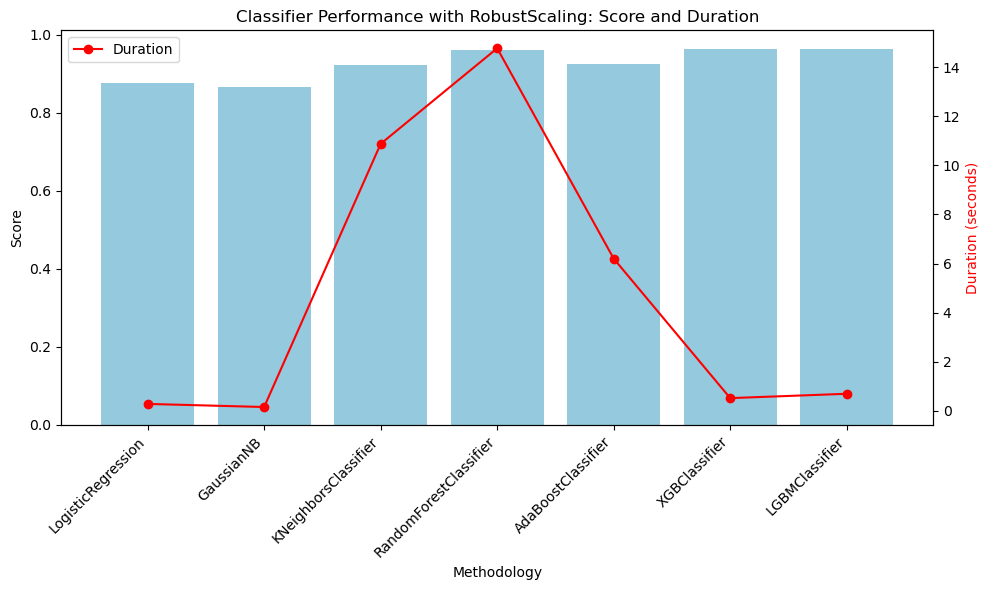

In [103]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bar plot for 'Score' on primary y-axis
sns.barplot(x='Methodology', y='Score', data=records_to_print, ax=ax1, color='skyblue')

# Set the label for the y-axis
ax1.set_ylabel('Score')

# Rotate the x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a secondary y-axis for 'Duration'
ax2 = ax1.twinx()

# Plot a line plot for 'Duration' on the secondary y-axis
ax2.plot(records_to_print['Methodology'], records_to_print['Duration'], color='red', marker='o', label='Duration')

# Set the label for the secondary y-axis
ax2.set_ylabel('Duration (seconds)',color = 'red')

# Add a title
plt.title('Classifier Performance with RobustScaling: Score and Duration')

# Display the legend for Duration
ax2.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [104]:
#PRINT ROC-AUC CURVES

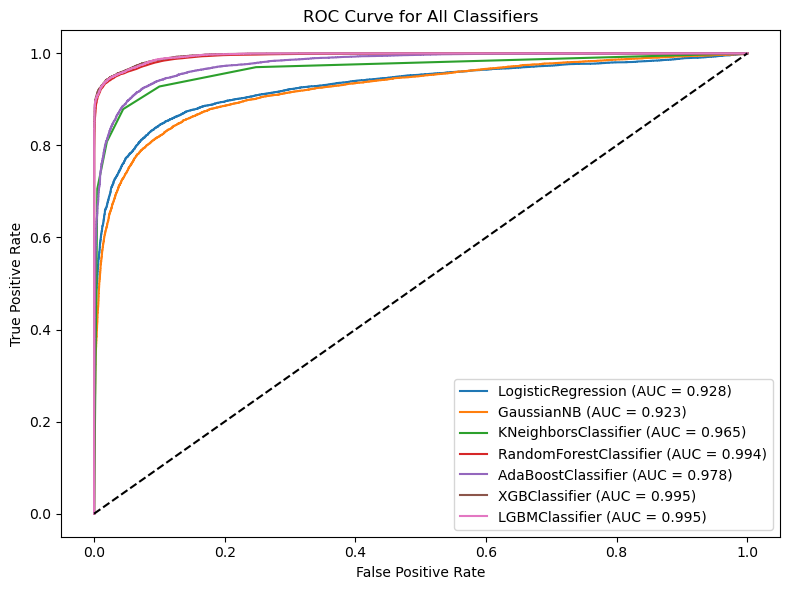

In [105]:
import matplotlib.pyplot as plt

# Create a figure for plotting
plt.figure(figsize=(8, 6))

# Loop through each row in the DataFrame to plot ROC curves
for idx, row in records_to_print.iterrows():
    # Extract the methodology name, FPR, TPR, and AUC for the current classifier
    methodology = row['Methodology']
    fpr = row['FPR']  # FPR is already a list
    tpr = row['TPR']  # TPR is already a list
    auc = row['AUC']
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{methodology} (AUC = {auc:.3f})')

# Plot the diagonal 45-degree line (random guessing)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Classifiers')

# Display the legend in the lower right corner
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


In [106]:
#PRINT FOR BOTH XGB and LGBM the Confusion Matrix

Accuracy for XGBClassifier is:  0.963
Accuracy for XGBClassifier is:  0.963


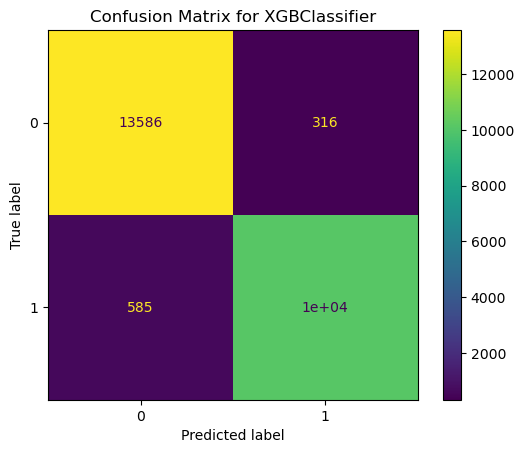

In [217]:
# Assuming you have true labels 'y_test' and predicted labels 'y_pred'
scaler = RobustScaler()
classifier = xgb.XGBClassifier(random_state = 42,use_label_encoder=False, eval_metric='logloss')
scaler_xgb = scaler.fit(X_train)
X_train_sc = scaler_xgb.transform(X_train)
X_test_sc = scaler_xgb.transform(X_test)
model_xgb = classifier.fit(X_train_sc, y_train)
y_pred = model_xgb.predict(X_test_sc)
accuracy = round(model_xgb.score(X_test_sc, y_test), 3)
accuracy2 = round(accuracy_score(y_test, y_pred),3)
print(f'Accuracy for {classifier.__class__.__name__} is: ',accuracy)
print(f'Accuracy for {classifier.__class__.__name__} is: ',accuracy2)

# Assuming you have true labels 'y_test' and predicted labels 'y_pred'
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# Add a title
plt.title(f'Confusion Matrix for {classifier.__class__.__name__}')
# Show the plot
plt.show()

### Find the Features that Make the most Importance with FEATURE IMPORTANCES
This will explain how the algoritm works but also where the business should focus so that they have happy customers

In [ ]:
#We will use Feature Importances - part of the algorithm statistics and also SelectKBest.

In [ ]:
scaler = RobustScaler()
classifier = xgb.XGBClassifier(random_state = 42,use_label_encoder=False, eval_metric='logloss')
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
model = classifier.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)
importance = pd.Series(classifier.feature_importances_, index=list(X))
importance = importance/importance.max()
importance = importance.sort_values(ascending=False).head(10)
#importance.sort_values().plot.barh(figsize=(19,15))


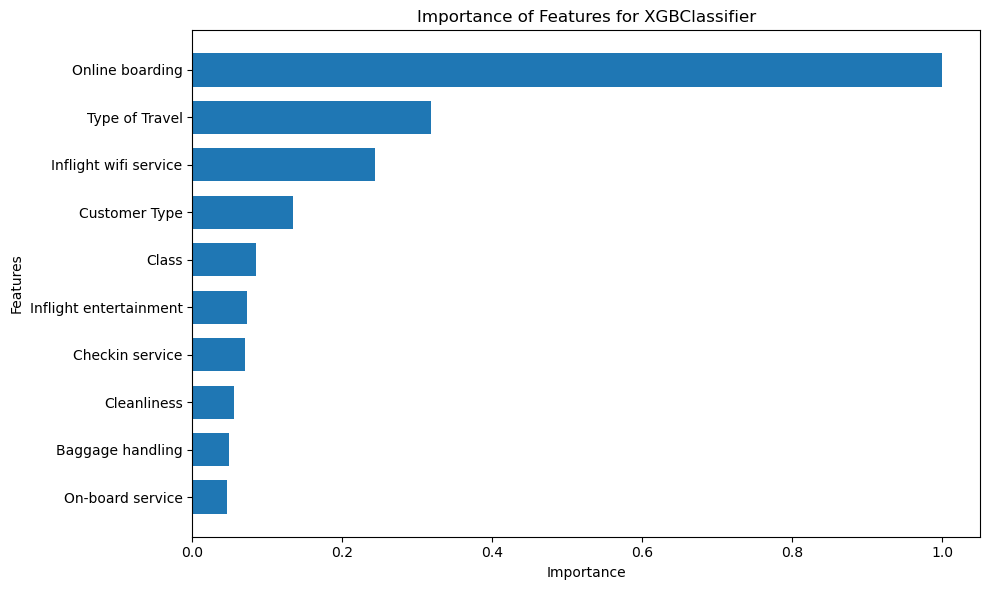

In [246]:
# Plot the feature importances
plt.figure(figsize=(10, 6))  # Adjust the figure size to make it more condensed
plt.barh(importance.index, importance, height=0.7)  # Adjust height to control bar width
# Invert the y-axis to show the most important feature on top
plt.gca().invert_yaxis()
# Add labels and title
plt.title('Importance of Features for XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Features')

# Tight layout to reduce extra white space
plt.tight_layout()

# Show plot
plt.show()


In [160]:
importance_df = pd.DataFrame(importance).reset_index()
importance_df.columns = ['Feature','Score1']

In [161]:
print(importance_df)

                              Feature    Score1
0                     Online boarding  1.000000
1                      Type of Travel  0.318463
2               Inflight wifi service  0.243441
3                       Customer Type  0.134680
4                               Class  0.084768
5              Inflight entertainment  0.072729
6                     Checkin service  0.069916
7                         Cleanliness  0.055144
8                    Baggage handling  0.049259
9                    On-board service  0.046917
10                   Inflight service  0.042970
11                   Leg room service  0.042576
12                       Seat comfort  0.039611
13                      Gate location  0.033171
14             Ease of Online booking  0.021589
15  Departure/Arrival time convenient  0.015296
16                                Age  0.012834
17           Arrival Delay in Minutes  0.011965
18                    Flight Distance  0.007507
19                     Food and drink  0

### SELECTKBEST

In [128]:
pd.DataFrame(X_train_sc).head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.041667,-1.0,0.0,-0.390684,0.0,1.0,0.0,0.0,...,-1.0,-1.0,-0.5,-1.0,-2.0,-1.0,-0.5,1.583333,0.384615,1.0
1,1.0,0.0,0.041667,0.0,-0.5,0.112697,0.0,0.0,0.0,0.0,...,-0.5,-1.5,-0.5,-1.5,0.0,-1.0,0.0,0.000000,0.384615,0.0
2,1.0,-1.0,-0.666667,0.0,0.5,-0.457551,0.5,0.5,0.5,0.5,...,-1.5,0.0,-0.5,0.0,1.0,0.5,-1.0,0.083333,0.000000,1.0
3,1.0,0.0,0.708333,0.0,0.5,1.761833,0.5,0.5,0.5,0.5,...,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.000000,0.000000,0.0
4,1.0,-1.0,-1.000000,0.0,-0.5,-0.163787,0.0,0.0,0.0,0.0,...,-1.5,0.0,-1.5,0.0,-2.0,-0.5,-1.0,1.750000,1.076923,1.0


In [130]:
X_train.shape[1]

23

In [163]:
scaler = RobustScaler()
X_train_sc = scaler.fit_transform(X_train)

#Will only show the 23 selected
#selected_features_fclassif = SelectKBest(f_classif, k=X_train.shape[1]).fit(X_train_sc, y_train).get_support(indices = True)

fit = SelectKBest(f_classif, k=X_train.shape[1]).fit(X_train_sc, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(23,'Score'))  #print 10 best features

                             Features         Score
11                    Online boarding  32991.263811
4                               Class  31597.632970
3                      Type of Travel  24955.935272
13             Inflight entertainment  18652.518553
12                       Seat comfort  13719.270648
14                   On-board service  11516.166728
15                   Leg room service  10797.021068
19                        Cleanliness  10348.020875
5                     Flight Distance   9492.118962
6               Inflight wifi service   8566.754235
16                   Baggage handling   6496.253940
18                   Inflight service   6325.387771
17                    Checkin service   5966.479634
10                     Food and drink   4606.095224
1                       Customer Type   3399.190219
8              Ease of Online booking   2871.820852
2                                 Age   1853.946682
22                            Delayed    330.836368
21          

In [164]:
featureScores.sort_values('Score', ascending = False)['Features'].values

array(['Online boarding', 'Class', 'Type of Travel',
       'Inflight entertainment', 'Seat comfort', 'On-board service',
       'Leg room service', 'Cleanliness', 'Flight Distance',
       'Inflight wifi service', 'Baggage handling', 'Inflight service',
       'Checkin service', 'Food and drink', 'Customer Type',
       'Ease of Online booking', 'Age', 'Delayed',
       'Arrival Delay in Minutes', 'Departure/Arrival time convenient',
       'Departure Delay in Minutes', 'Gender', 'Gate location'],
      dtype=object)

In [165]:
importance.index == featureScores.sort_values('Score', ascending = False)['Features'].values

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False])

Since we are looking at Tree Based Models we are going to favor the feature_importances_

### Run XGB for the first 10 features only

In [170]:
keep10 = ['Online boarding', 'Type of Travel', 'Inflight wifi service', 'Customer Type', 'Class', 'Inflight entertainment', 'Checkin service', 'Cleanliness', 'Baggage handling', 'On-board service', 'Inflight service']

In [172]:
X_train[keep10].head(2)

,Online boarding,Type of Travel,Inflight wifi service,Customer Type,Class,Inflight entertainment,Checkin service,Cleanliness,Baggage handling,On-board service,Inflight service
33065,3,0,3,1,1,2,1,2,2,2,2
91811,3,1,3,1,0,3,3,3,1,1,2


Accuracy for XGBClassifier is:  0.957


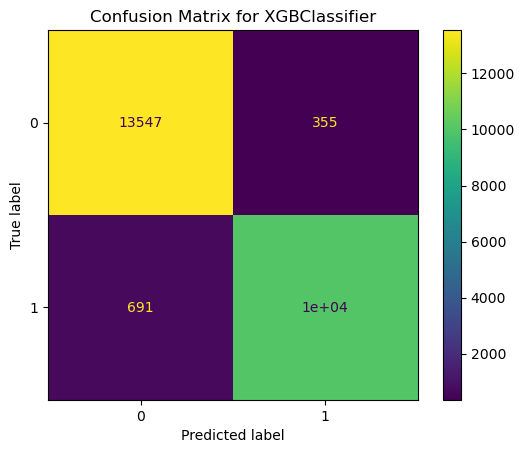

In [214]:
# Assuming you have true labels 'y_test' and predicted labels 'y_pred'
scaler = RobustScaler()
classifier = xgb.XGBClassifier(random_state = 42,use_label_encoder=False, eval_metric='logloss')
X_train_sc = scaler.fit_transform(X_train[keep10])
X_test_sc = scaler.transform(X_test[keep10])
model_xgb_10 = classifier.fit(X_train_sc, y_train)
y_pred = model_xgb_10.predict(X_test_sc)
accuracy = round(model_xgb_10.score(X_test_sc, y_test), 3)
print(f'Accuracy for {classifier.__class__.__name__} is: ',accuracy)

# Assuming you have true labels 'y_test' and predicted labels 'y_pred'
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# Add a title
plt.title(f'Confusion Matrix for {classifier.__class__.__name__}')
# Show the plot
plt.show()

### **We have reached the same accuracy in XGB with half of the features**

### Take the VALIDATION  SET , MAKE PREDICTIONS and COMPARE with the REAL VALUES

In [183]:
dfval.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Delayed
98173,101237,Female,Loyal Customer,51,Business travel,Business,1587,1,4,1,...,4,4,4,5,4,4,8,0.0,satisfied,1
24942,119822,Male,disloyal Customer,38,Business travel,Business,936,3,3,3,...,5,5,5,3,5,3,0,0.0,neutral or dissatisfied,0
69235,84623,Female,Loyal Customer,7,Personal Travel,Eco,669,3,4,2,...,5,5,5,3,4,5,0,0.0,neutral or dissatisfied,0
90480,118614,Male,Loyal Customer,42,Business travel,Business,1832,1,1,1,...,4,4,4,3,4,5,0,0.0,satisfied,0
36184,113208,Male,Loyal Customer,52,Business travel,Business,2143,3,2,2,...,3,3,3,3,3,3,0,0.0,neutral or dissatisfied,0


In [206]:
# Drop the 'id' column
#dfval.drop('id', axis=1, inplace=True)

# Convert categorical columns to binary
dfval['Gender'] = (dfval['Gender'] == 'Male').astype(int)
dfval['Customer Type'] = (dfval['Customer Type'] == 'Loyal Customer').astype(int)
dfval['Type of Travel'] = (dfval['Type of Travel'] == 'Business travel').astype(int)
dfval['satisfaction'] = (dfval['satisfaction'] == 'satisfied').astype(int)
dfval['Class'] = ordinal_encoder.transform(dfval[['Class']]).astype(int)
# X and y DataFrames for the model
Xval = dfval.drop(['id','satisfaction'], axis = 1)
yval = dfval['satisfaction']
# Scale X
Xval_sc = scaler_xgb.transform(Xval)
# Make the predictions
y_pred_val = model_xgb.predict(Xval_sc)
#
# y_pred_val are the predicted values and yval are the true values
accuracy = accuracy_score(yval, y_pred_val)

In [229]:
yval.head()

98173    1
24942    0
69235    0
90480    1
36184    0
Name: satisfaction, dtype: int32

In [225]:

# Print the accuracy
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.962


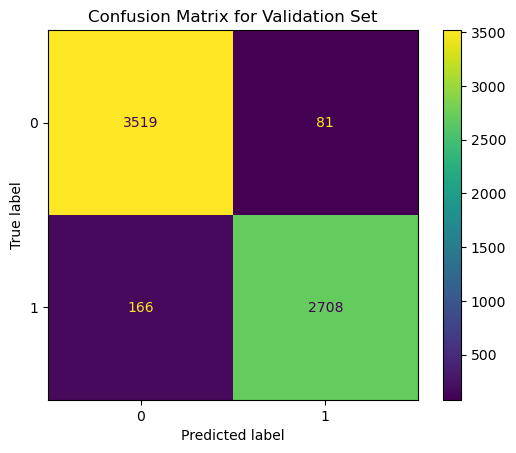

In [227]:
# Assuming you have true labels 'y_test' and predicted labels 'y_pred'
ConfusionMatrixDisplay.from_predictions(yval, y_pred_val)
# Add a title
plt.title(f'Confusion Matrix for Validation Set')
# Show the plot
plt.show()

Now use the Customer id , to show which customers will be satisfied and which will b not

In [231]:
# Create a new DataFrame with all the lists
df_results = pd.DataFrame({
    'CustomerID': customersval,
    'Predicted': y_pred_val,
    'Actual': yval
})

# Display the new DataFrame
print(df_results)


        CustomerID  Predicted  Actual
98173       101237          1       1
24942       119822          0       0
69235        84623          0       0
90480       118614          1       1
36184       113208          0       0
...            ...        ...     ...
93986        93295          1       1
80454       103804          0       0
104353       39020          1       1
52995       127835          0       0
19493        35175          0       0

[6474 rows x 3 columns]


In [233]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6474 entries, 98173 to 19493
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CustomerID  6474 non-null   int64
 1   Predicted   6474 non-null   int32
 2   Actual      6474 non-null   int32
dtypes: int32(2), int64(1)
memory usage: 151.7 KB


In [237]:
df_results[df_results['CustomerID'] == 118614]

,CustomerID,Predicted,Actual
90480,118614,1,1


Ideas from : https://www.kaggle.com/code/chandrimad31/flight-passenger-satisfaction-eda-and-prediction